In [2]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import sys
from pathlib import Path
current_script_path = Path().resolve()

functions_dir = current_script_path.parents[0] / 'Functions'
sys.path.insert(0, str(functions_dir))
print(functions_dir)
import mouse as mouse

ssm_dir = current_script_path.parents[1] / 'SSM'
sys.path.insert(0, str(ssm_dir))
print(ssm_dir)
import ssm as ssm
from ssm.plots import gradient_cmap

aeon_mecha_dir = current_script_path.parents[1] / 'aeon_mecha' 
sys.path.insert(0, str(aeon_mecha_dir))
print(aeon_mecha_dir)
import aeon
import aeon.io.api as api
from aeon.io import reader, video
from aeon.schema.schemas import social02
from aeon.schema.dataset import exp02
from aeon.schema.schemas import social02
from aeon.analysis.utils import visits, distancetravelled

LABELS = [
    ['AEON3', 'Pre','BAA-1104045'],
    ['AEON3', 'Pre','BAA-1104047'],
    ['AEON3', 'Post','BAA-1104045'],
    ['AEON3', 'Post','BAA-1104047'],
    ['AEON4', 'Pre','BAA-1104048'], 
    ['AEON4', 'Pre','BAA-1104049'],
    ['AEON4', 'Post','BAA-1104048'],
    ['AEON4', 'Post','BAA-1104049']
]
nodes_name = ['nose', 'head', 'right_ear', 'left_ear', 'spine1', 'spine2','spine3', 'spine4']
color_names = [
    'black', 'blue', 'red', 'tan', 'green', 'brown', 
    'purple', 'orange', 'turquoise', 'yellow', 'pink', 
    'darkblue', 'lime', 'cyan', 'magenta', 'gold', 
    'navy', 'maroon', 'teal', 'grey'
]

2024-08-16 18:34:27.177393: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /nfs/nhome/live/zimol/.local/lib/python3.9/site-packages/cv2/../../lib64:
2024-08-16 18:34:27.177475: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/nfs/nhome/live/zimol/ProjectAeon/Code/Functions
/nfs/nhome/live/zimol/ProjectAeon/SSM
/nfs/nhome/live/zimol/ProjectAeon/aeon_mecha


In [2]:
data = []
for label in LABELS:
    aeon_exp_name, type_name, mouse_name = label[0], label[1], label[2]
    print('Start Processing: ', type_name, "-", mouse_name)
    
    Mouse = mouse.Mouse(aeon_exp = aeon_exp_name, type = type_name, mouse = mouse_name)
    
    exp_session = mouse.Session(aeon_exp = Mouse.aeon_exp, type = Mouse.type, mouse = Mouse.mouse, start = Mouse.starts[0], end = Mouse.ends[0])
    exp_session.kinematics.Run(Mouse)
    mouse_lds_parameters = exp_session.kinematics.parameters
    sigma_a = mouse_lds_parameters['sigma_a']
    sigma_x = mouse_lds_parameters['sigma_x']
    sigma_y = mouse_lds_parameters['sigma_y']
    
    data.append({
        'aeon_exp_name': aeon_exp_name,
        'type_name': type_name,
        'mouse_name': mouse_name,
        'sigma_a': sigma_a,
        'sigma_x': sigma_x,
        'sigma_y': sigma_y
    })

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

Start Processing:  Pre - BAA-1104045
Start Processing:  Pre - BAA-1104047
Start Processing:  Post - BAA-1104045
Start Processing:  Post - BAA-1104047
Start Processing:  Pre - BAA-1104048
Start Processing:  Pre - BAA-1104049
Start Processing:  Post - BAA-1104048
Start Processing:  Post - BAA-1104049
  aeon_exp_name type_name   mouse_name    sigma_a    sigma_x   sigma_y
0         AEON3       Pre  BAA-1104045  67.641609  -3.543099 -1.909919
1         AEON3       Pre  BAA-1104047  22.405348  -0.498391 -1.331359
2         AEON3      Post  BAA-1104045  52.620827  20.286659  1.777865
3         AEON3      Post  BAA-1104047  40.153339   1.690730  2.046199
4         AEON4       Pre  BAA-1104048  25.049131  -1.085169  1.128768
5         AEON4       Pre  BAA-1104049  30.033833  -4.325229  0.511806
6         AEON4      Post  BAA-1104048  54.092953  -6.531082 -0.949189
7         AEON4      Post  BAA-1104049  45.007648   1.105224 -2.719236


In [3]:
# Convert the DataFrame to a LaTeX table
latex_table = df.to_latex(index=False)

# Print the LaTeX table
print(latex_table)

\begin{tabular}{lllrrr}
\toprule
aeon_exp_name & type_name & mouse_name & sigma_a & sigma_x & sigma_y \\
\midrule
AEON3 & Pre & BAA-1104045 & 67.641609 & -3.543099 & -1.909919 \\
AEON3 & Pre & BAA-1104047 & 22.405348 & -0.498391 & -1.331359 \\
AEON3 & Post & BAA-1104045 & 52.620827 & 20.286659 & 1.777865 \\
AEON3 & Post & BAA-1104047 & 40.153339 & 1.690730 & 2.046199 \\
AEON4 & Pre & BAA-1104048 & 25.049131 & -1.085169 & 1.128768 \\
AEON4 & Pre & BAA-1104049 & 30.033833 & -4.325229 & 0.511806 \\
AEON4 & Post & BAA-1104048 & 54.092953 & -6.531082 & -0.949189 \\
AEON4 & Post & BAA-1104049 & 45.007648 & 1.105224 & -2.719236 \\
\bottomrule
\end{tabular}



In [3]:
Mouse = mouse.Mouse(aeon_exp = 'AEON3', type = 'Post', mouse = 'BAA-1104047')
color_names = [
    'black', 'blue', 'red', 'tan', 'green', 'brown', 
    'purple', 'orange', 'magenta', 'olive', 'pink', 
    'darkblue', 'lime', 'cyan', 'magenta', 'gold', 
    'navy', 'maroon', 'teal', 'grey'
]
Mouse.Run_Visits()

NODES = [['head', 'spine3'],['spine1', 'spine3'],['left_ear', 'spine3'],['right_ear', 'spine3']]
for nodes in NODES:
    Mouse.Add_Body_Info_to_mouse_pos(property = 'distance', nodes = nodes)
Mouse.hmm.Get_States(n_state = 10, feature = 'Kinematics_and_Body')
Mouse.mouse_pos['state'] = Mouse.hmm.states

Get_Visits Completed


In [ ]:
# Likelihood Ratio Test to compare the two distributions
def likelihood_ratio_test(data1, data2):
    # Combine both data sets
    combined_data = np.concatenate([data1, data2])
    
    # Fit combined data with a single gamma distribution
    shape_comb, loc_comb, scale_comb = stats.gamma.fit(combined_data, floc=0)
    
    # Calculate log-likelihoods for individual and combined models
    ll1 = np.sum(stats.gamma.logpdf(data1, shape_A, loc_A, scale_A))
    ll2 = np.sum(stats.gamma.logpdf(data2, shape_B, loc_B, scale_B))
    ll_comb = np.sum(stats.gamma.logpdf(combined_data, shape_comb, loc_comb, scale_comb))
    
    # Likelihood ratio statistic
    LRT_stat = 2 * ((ll1 + ll2) - ll_comb)
    
    # Degrees of freedom: 2 (each distribution has shape and scale parameters)
    df = 2
    
    # p-value
    p_value = stats.chi2.sf(LRT_stat, df)
    
    return LRT_stat, p_value


diff = np.zeros((len(speed), len(speed)))
for i in range(len(speed)):
    for j in range(len(speed)):
        data_A = acce[i]
        data_B = acce[j]
        
        shape_A, loc_A, scale_A = stats.gamma.fit(data_A, floc=0)
        shape_B, loc_B, scale_B = stats.gamma.fit(data_B, floc=0)

        print(f"Estimated parameters for distribution A: shape={shape_A}, scale={scale_A}")
        print(f"Estimated parameters for distribution B: shape={shape_B}, scale={scale_B}")

        # Perform the likelihood ratio test
        lrt_stat, p_value = likelihood_ratio_test(data_A, data_B)
        diff[i][j] = p_value

fig, axs = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(diff, cmap='RdBu', ax = axs, square = 'True', cbar = True)
axs.set_title("Comparison within Trial", fontsize = 25)
'''axs.set_xticklabels(labels)
axs.set_yticklabels(labels, rotation = 0)
axs.tick_params(axis='both', which='major', labelsize=20)'''
plt.tight_layout()
plt.show()

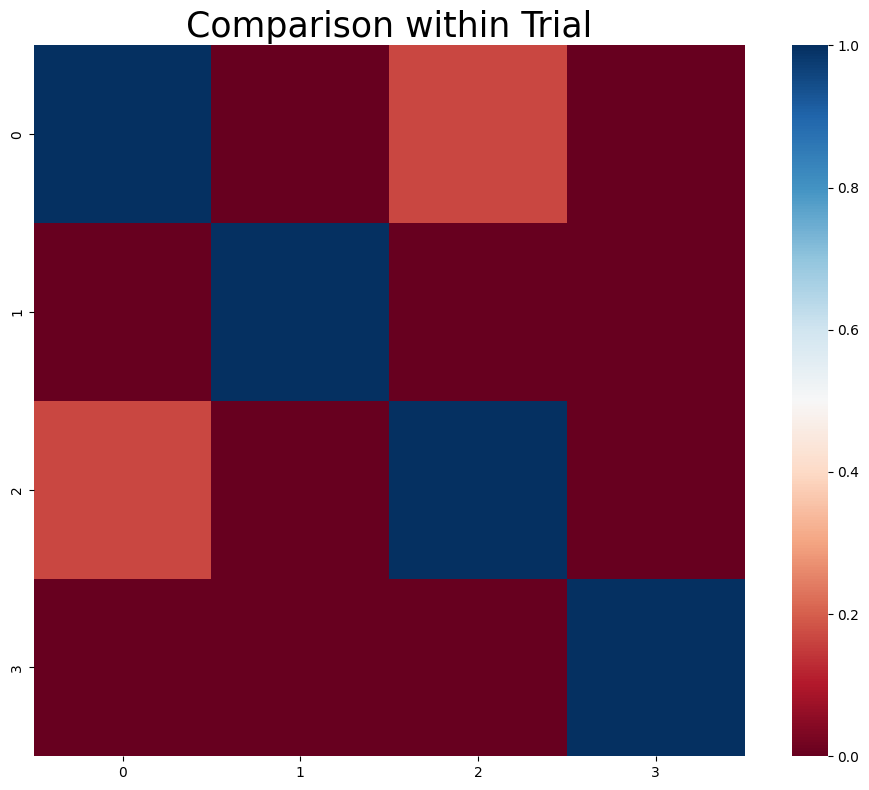

In [70]:
# Likelihood Ratio Test to compare the two distributions
def likelihood_ratio_test_exponential(data1, data2):
    # Combine both data sets
    combined_data = np.concatenate([data1, data2])
    
    # Fit combined data with a single exponential distribution
    rate_combined = 1 / np.mean(combined_data)
    
    # Calculate log-likelihoods for individual and combined models
    ll1 = np.sum(stats.expon.logpdf(data1, scale=1/rate_A))
    ll2 = np.sum(stats.expon.logpdf(data2, scale=1/rate_B))
    ll_combined = np.sum(stats.expon.logpdf(combined_data, scale=1/rate_combined))
    
    # Likelihood ratio statistic
    LRT_stat = 2 * ((ll1 + ll2) - ll_combined)
    
    # Degrees of freedom: 1 (each distribution has only the rate parameter)
    df = 1
    
    # p-value
    p_value = stats.chi2.sf(LRT_stat, df)
    
    return LRT_stat, p_value

diff = np.zeros((len(speed), len(speed)))
for i in range(len(speed)):
    for j in range(len(speed)):
        data_A = speed[i]
        data_B = speed[j]
        
        rate_A = 1 / np.mean(data_A)
        rate_B = 1 / np.mean(data_B)

        # Perform the likelihood ratio test
        lrt_stat, p_value = likelihood_ratio_test_exponential(data_A, data_B)
        diff[i][j] = p_value
        
fig, axs = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(diff, cmap='RdBu', ax = axs, square = 'True', cbar = True)
axs.set_title("Comparison within Trial", fontsize = 25)
'''axs.set_xticklabels(labels)
axs.set_yticklabels(labels, rotation = 0)
axs.tick_params(axis='both', which='major', labelsize=20)'''
plt.tight_layout()
plt.show()

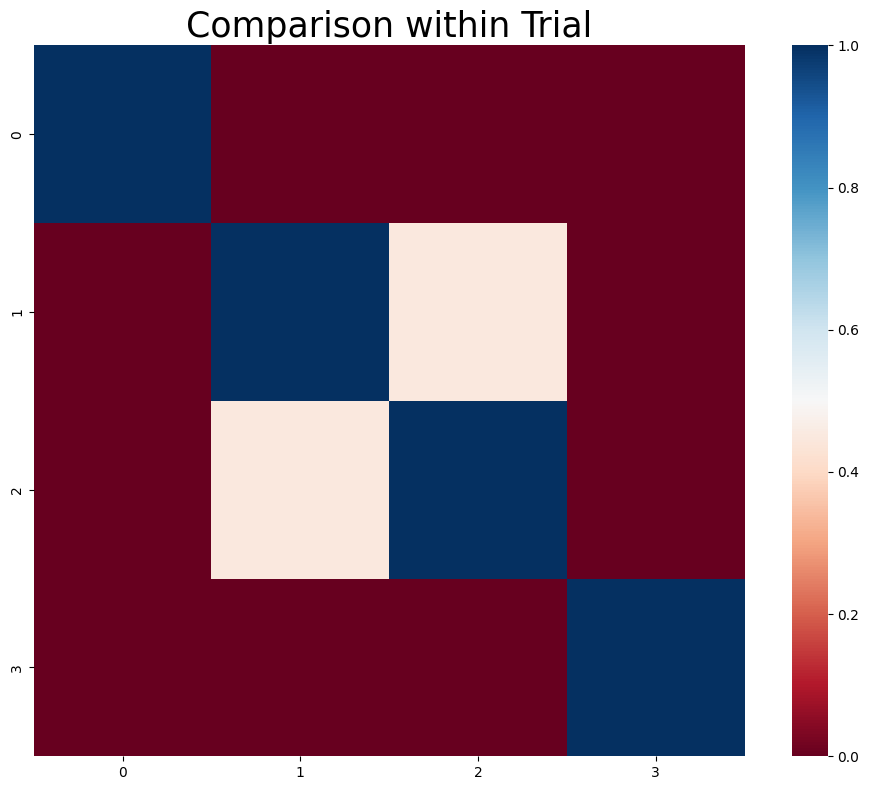

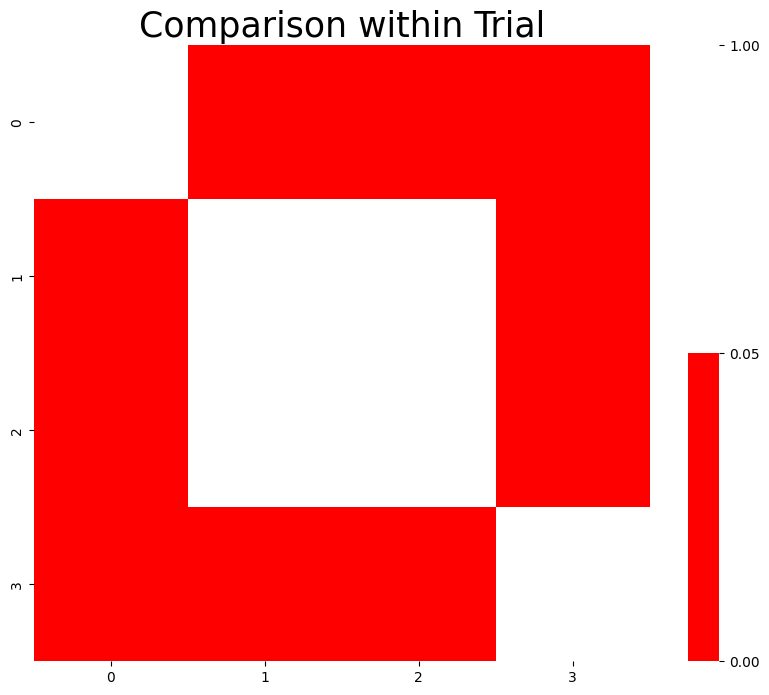

<Figure size 800x800 with 0 Axes>

In [71]:
diff = np.zeros((len(speed), len(speed)))
for i in range(len(speed)):
    for j in range(len(speed)):
        data_A = speed[i]
        data_B = speed[j]

        if len(data_A) == 0 or len(data_B) == 0: 
            diff[i][j] = 1
            continue
        
        u_stat, u_p_value = stats.mannwhitneyu(data_A, data_B, alternative='two-sided')
        diff[i][j] = u_p_value

#annot_array = np.array([[round(item, 3) for item in row] for row in diff])
#labels = [str(Hour[i]) for i in range(len(Hour))]

fig, axs = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(diff, cmap='RdBu', ax = axs, square = 'True', cbar = True)
axs.set_title("Comparison within Trial", fontsize = 25)
'''axs.set_xticklabels(labels)
axs.set_yticklabels(labels, rotation = 0)
axs.tick_params(axis='both', which='major', labelsize=20)'''
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1,1, figsize=(10,8))
# Create a custom color map: red for values less than 0.05, white for the rest
masked_matrix = np.ma.masked_greater_equal(diff, 0.05)
cmap = mcolors.ListedColormap(['red', 'white'])
bounds = [0, 0.05, 1]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the matrix
plt.figure(figsize=(8, 8))
sns.heatmap(masked_matrix, ax = axs, square=True, cmap=cmap, norm=norm, cbar = True)
axs.set_title("Comparison within Trial", fontsize = 25)
#plt.colorbar()  # Optional: if you want to add a colorbar
plt.tight_layout()
plt.show()

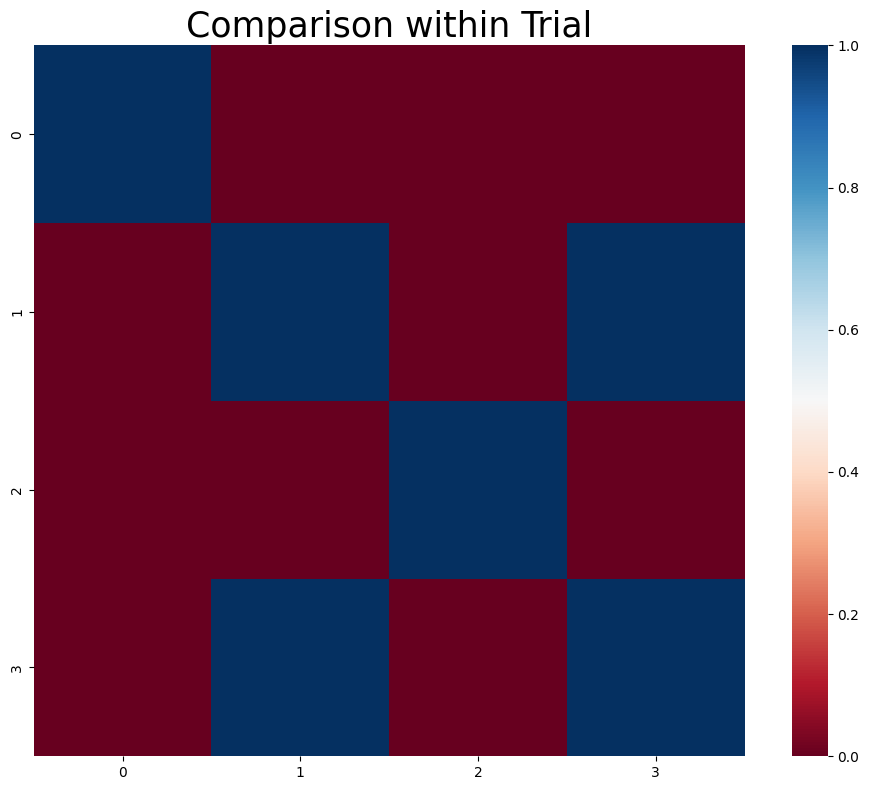

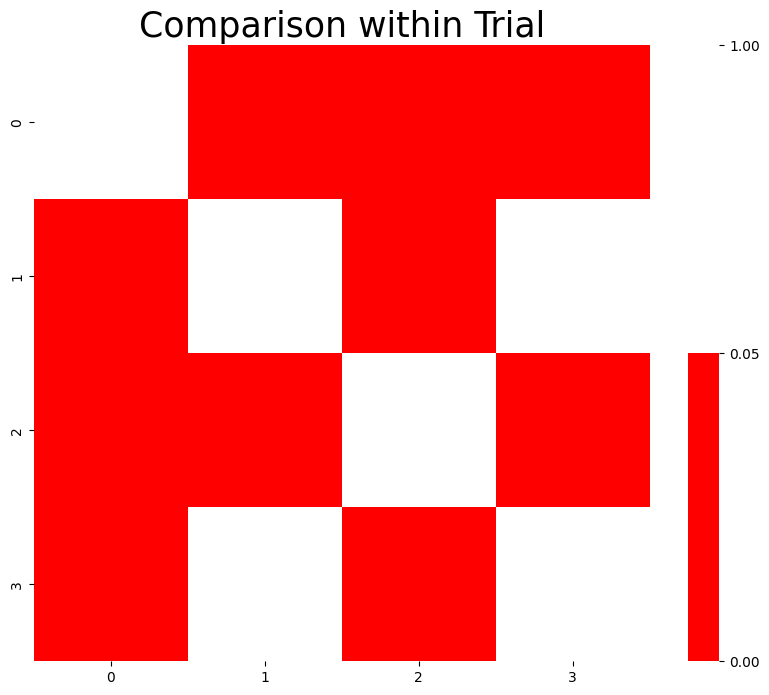

<Figure size 800x800 with 0 Axes>

In [77]:
diff = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        data_A = acce[i]
        data_B = acce[j]

        if len(data_A) == 0 or len(data_B) == 0: 
            diff[i][j] = 1
            continue
        
        ks_stat, ks_p_value = stats.ks_2samp(data_A, data_B)
        diff[i][j] = ks_p_value

#annot_array = np.array([[round(item, 3) for item in row] for row in diff])
#labels = [str(Hour[i]) for i in range(len(Hour))]

fig, axs = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(diff, cmap='RdBu', ax = axs, square = 'True', cbar = True)
axs.set_title("Comparison within Trial", fontsize = 25)
'''axs.set_xticklabels(labels)
axs.set_yticklabels(labels, rotation = 0)
axs.tick_params(axis='both', which='major', labelsize=20)'''
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1,1, figsize=(10,8))
# Create a custom color map: red for values less than 0.05, white for the rest
masked_matrix = np.ma.masked_greater_equal(diff, 0.05)
cmap = mcolors.ListedColormap(['red', 'white'])
bounds = [0, 0.05, 1]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the matrix
plt.figure(figsize=(8, 8))
sns.heatmap(masked_matrix, ax = axs, square=True, cmap=cmap, norm=norm, cbar = True)
axs.set_title("Comparison within Trial", fontsize = 25)
#plt.colorbar()  # Optional: if you want to add a colorbar
plt.tight_layout()
plt.show()

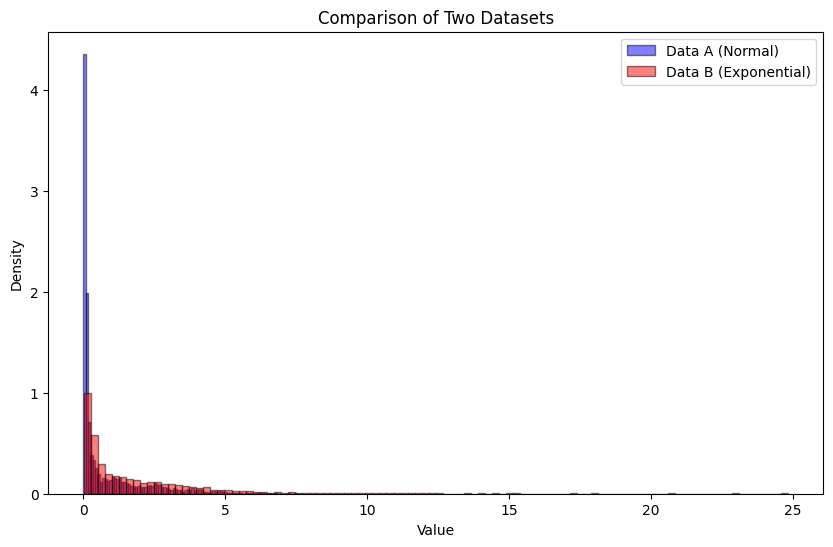

In [76]:
data_A = speed[3]
data_B = speed[1]
plt.figure(figsize=(10, 6))
plt.hist(data_A[data_A<25], bins=100, alpha=0.5, label='Data A (Normal)', color='blue', edgecolor='black', density=True)
plt.hist(data_B[data_B<25], bins=100, alpha=0.5, label='Data B (Exponential)', color='red', edgecolor='black', density=True)
plt.title('Comparison of Two Datasets')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [58]:
ks_stat, ks_p_value = stats.ks_2samp(data_A, data_B)
print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

Kolmogorov-Smirnov Test Statistic: 0.09971945223743786
P-value: 2.874854455147659e-156


In [22]:
data_A = speed[49]
data_B = speed[73]

shape_A, loc_A, scale_A = stats.gamma.fit(data_A, floc=0)
shape_B, loc_B, scale_B = stats.gamma.fit(data_B, floc=0)

print(f"Estimated parameters for distribution A: shape={shape_A}, scale={scale_A}")
print(f"Estimated parameters for distribution B: shape={shape_B}, scale={scale_B}")

# Perform the likelihood ratio test
lrt_stat, p_value = likelihood_ratio_test(data_A, data_B)

Estimated parameters for distribution A: shape=0.33206380382008716, scale=69.06002268770209
Estimated parameters for distribution B: shape=0.351759142645652, scale=90.68948193510064


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


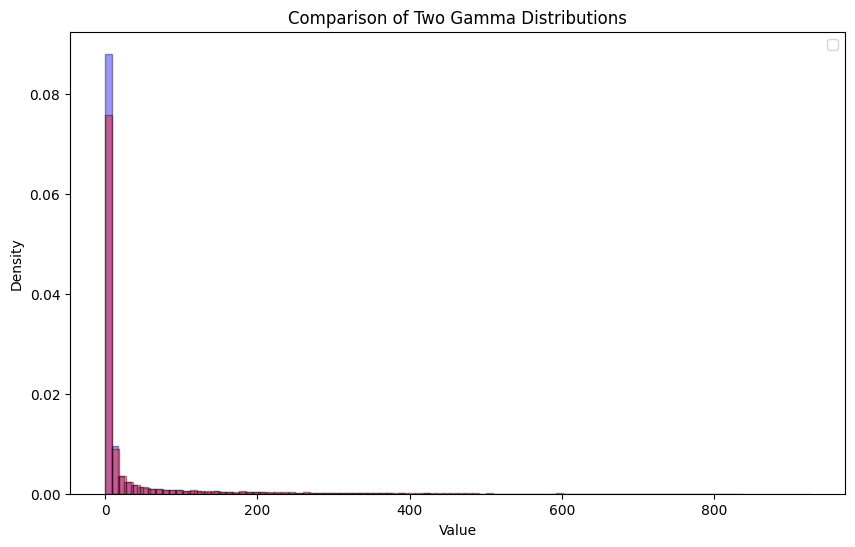

In [28]:
x = np.linspace(0, 1000, 10000)
pdf_A = stats.gamma.pdf(x, shape_A, loc_A, scale_A)
pdf_B = stats.gamma.pdf(x, shape_B, loc_B, scale_B)

plt.figure(figsize=(10, 6))
'''plt.plot(x, pdf_A, label='Gamma Distribution A', color='blue')
plt.plot(x, pdf_B, label='Gamma Distribution B', color='red')'''
plt.hist(data_A, bins=100, density=True, alpha=0.4, color='blue', edgecolor='black')
plt.hist(data_B, bins=100, density=True, alpha=0.4, color='red', edgecolor='black')
plt.title('Comparison of Two Gamma Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

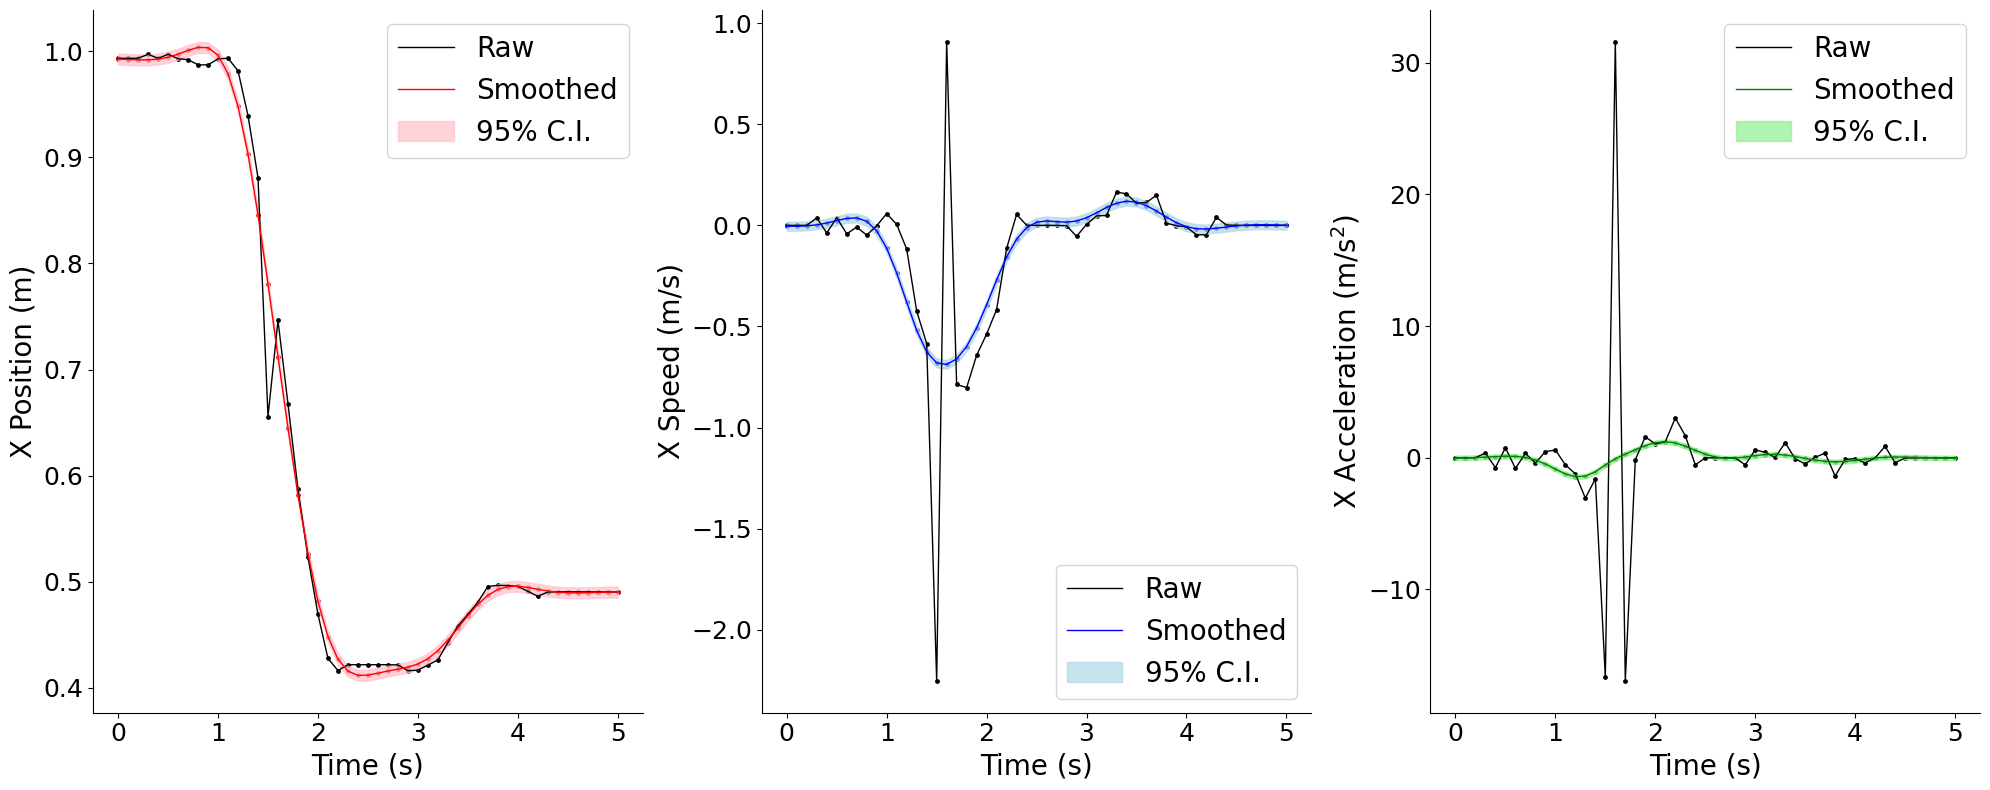

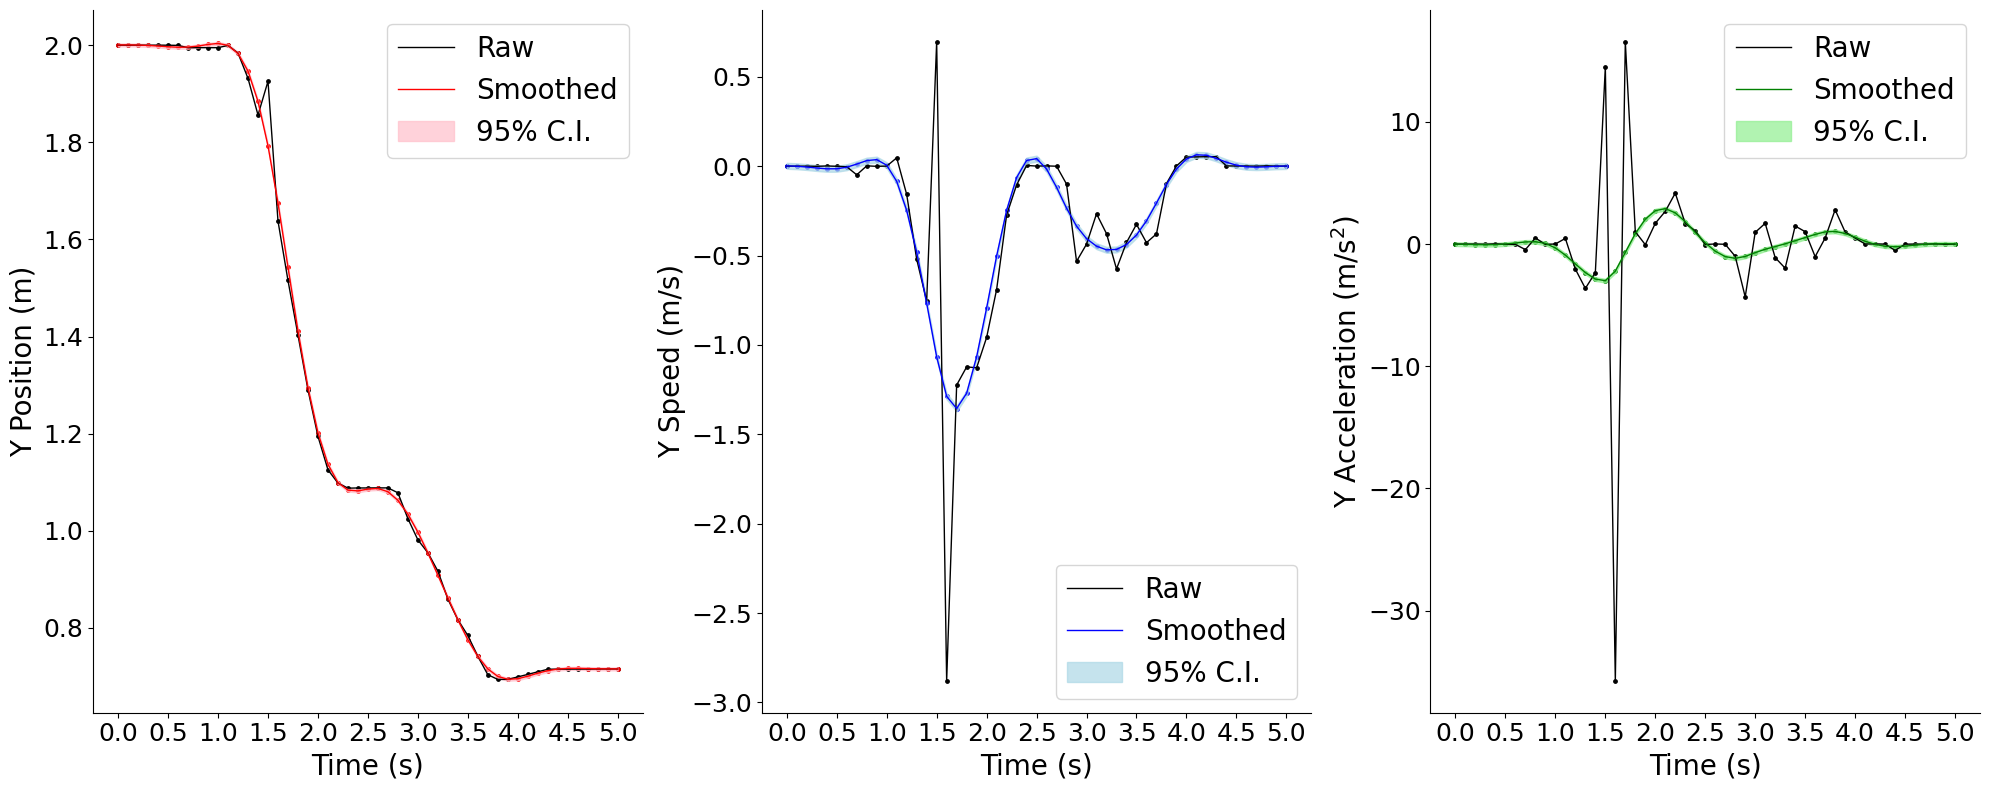

In [ ]:
run_time = Mouse.mouse_pos.index[85130]
mouse_pos = Mouse.mouse_pos[run_time:run_time + pd.Timedelta('5S')]
start, end = mouse_pos.index[0], mouse_pos.index[-1]

dt = (mouse_pos.index[1] - mouse_pos.index[0]).total_seconds()
scale = 2e-3

x = mouse_pos.x[start:end] * scale
x_vel = np.array([(x[i+1]-x[i])/dt for i in range(len(x)-1)])
x_vel = np.concatenate((np.array([0]), x_vel))
x_acce = np.array([(x_vel[i+1]-x_vel[i])/dt for i in range(len(x_vel)-1)])
x_acce = np.concatenate((np.array([0]), x_acce))
    
smooth_x = mouse_pos.smoothed_position_x[start:end] * scale
smooth_x_var = mouse_pos.smoothed_position_x_var[start:end] * scale ** 2

smooth_x_vel = mouse_pos.smoothed_velocity_x[start:end] * scale
smooth_x_vel_var = mouse_pos.smoothed_velocity_x_var[start:end] * scale ** 2

smooth_x_acce = mouse_pos.smoothed_acceleration_x[start:end] * scale
smooth_x_acce_var = mouse_pos.smoothed_acceleration_x_var[start:end] * scale ** 2

time = np.arange(0, len(x), 1)
time = time * dt
    
fig, axs = plt.subplots(1,3, figsize = (20,8))

axs[0].set_ylabel('X Position (m)', fontsize = 20)
axs[0].plot(time, x, color = 'black', linewidth = 1, label = 'Raw')
axs[0].scatter(time, x, color = 'black', s = 6)
axs[0].plot(time, smooth_x, color = 'red', linewidth = 1, label = 'Smoothed')
axs[0].scatter(time, smooth_x, color = 'red', s = 6)
axs[0].fill_between(time, smooth_x - 1.65*(smooth_x_var**0.5), smooth_x + 1.65*(smooth_x_var**0.5), color = 'pink', alpha = 0.7, label = '95% C.I.')
axs[0].legend(loc = 'upper right', fontsize = 20)
axs[0].tick_params(axis='both', which='major', labelsize=18)

axs[1].set_ylabel('X Speed (m/s)', fontsize = 20)
axs[1].plot(time, x_vel, color = 'black', linewidth = 1, label = 'Raw')
axs[1].scatter(time, x_vel, color = 'black', s = 6)
axs[1].plot(time, smooth_x_vel, color = 'blue', linewidth = 1, label = 'Smoothed')
axs[1].scatter(time, smooth_x_vel, color = 'blue', s=6)
axs[1].fill_between(time, smooth_x_vel - 1.65*(smooth_x_vel_var**0.5), smooth_x_vel + 1.65*(smooth_x_vel_var**0.5), color = 'lightblue', alpha = 0.7, label = '95% C.I.')
axs[1].legend(loc = 'lower right', fontsize = 20)
axs[1].tick_params(axis='both', which='major', labelsize=18)

axs[2].set_ylabel('X Acceleration (m/s$^2$)', fontsize = 20)
axs[2].plot(time, x_acce, color = 'black', linewidth = 1, label = 'Raw')
axs[2].scatter(time, x_acce, color = 'black', s = 6)
axs[2].plot(time, smooth_x_acce, color = 'green', linewidth = 1, label = 'Smoothed')
axs[2].scatter(time, smooth_x_acce, color = 'green', s=6)
axs[2].fill_between(time, smooth_x_acce - 1.65*(smooth_x_acce_var**0.5), smooth_x_acce + 1.65*(smooth_x_acce_var**0.5), color = 'lightgreen', alpha = 0.7, label = '95% C.I.')
axs[2].legend(loc = 'upper right', fontsize = 20)
axs[2].tick_params(axis='both', which='major', labelsize=18)

for i in range(3):
    axs[i].set_xticks(np.arange(0,time[-1]+0.01, 1))
    axs[i].set_xlabel('Time (s)', fontsize = 20)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
plt.tight_layout()
plt.show()

x = mouse_pos.y[start:end] * scale
x_vel = np.array([(x[i+1]-x[i])/dt for i in range(len(x)-1)])
x_vel = np.concatenate((np.array([0]), x_vel))
x_acce = np.array([(x_vel[i+1]-x_vel[i])/dt for i in range(len(x_vel)-1)])
x_acce = np.concatenate((np.array([0]), x_acce))
    
smooth_x = mouse_pos.smoothed_position_y[start:end] * scale
smooth_x_var = mouse_pos.smoothed_position_y_var[start:end] * scale ** 2

smooth_x_vel = mouse_pos.smoothed_velocity_y[start:end] * scale
smooth_x_vel_var = mouse_pos.smoothed_velocity_y_var[start:end] * scale ** 2

smooth_x_acce = mouse_pos.smoothed_acceleration_y[start:end] * scale
smooth_x_acce_var = mouse_pos.smoothed_acceleration_y_var[start:end] * scale ** 2

time = np.arange(0, len(x), 1)
time = time * dt
    
fig, axs = plt.subplots(1,3, figsize = (20,8))

axs[0].set_ylabel('Y Position (m)', fontsize = 20)
axs[0].plot(time, x, color = 'black', linewidth = 1, label = 'Raw')
axs[0].scatter(time, x, color = 'black', s = 6)
axs[0].plot(time, smooth_x, color = 'red', linewidth = 1, label = 'Smoothed')
axs[0].scatter(time, smooth_x, color = 'red', s = 6)
axs[0].fill_between(time, smooth_x - 1.65*(smooth_x_var**0.5), smooth_x + 1.65*(smooth_x_var**0.5), color = 'pink', alpha = 0.7, label = '95% C.I.')
axs[0].legend(loc = 'upper right', fontsize = 20)
axs[0].tick_params(axis='both', which='major', labelsize=18)

axs[1].set_ylabel('Y Speed (m/s)', fontsize = 20)
axs[1].plot(time, x_vel, color = 'black', linewidth = 1, label = 'Raw')
axs[1].scatter(time, x_vel, color = 'black', s = 6)
axs[1].plot(time, smooth_x_vel, color = 'blue', linewidth = 1, label = 'Smoothed')
axs[1].scatter(time, smooth_x_vel, color = 'blue', s=6)
axs[1].fill_between(time, smooth_x_vel - 1.65*(smooth_x_vel_var**0.5), smooth_x_vel + 1.65*(smooth_x_vel_var**0.5), color = 'lightblue', alpha = 0.7, label = '95% C.I.')
axs[1].legend(loc = 'lower right', fontsize = 20)
axs[1].tick_params(axis='both', which='major', labelsize=18)

axs[2].set_ylabel('Y Acceleration (m/s$^2$)', fontsize = 20)
axs[2].plot(time, x_acce, color = 'black', linewidth = 1, label = 'Raw')
axs[2].scatter(time, x_acce, color = 'black', s = 6)
axs[2].plot(time, smooth_x_acce, color = 'green', linewidth = 1, label = 'Smoothed')
axs[2].scatter(time, smooth_x_acce, color = 'green', s=6)
axs[2].fill_between(time, smooth_x_acce - 1.65*(smooth_x_acce_var**0.5), smooth_x_acce + 1.65*(smooth_x_acce_var**0.5), color = 'lightgreen', alpha = 0.7, label = '95% C.I.')
axs[2].legend(loc = 'upper right', fontsize = 20)
axs[2].tick_params(axis='both', which='major', labelsize=18)

for i in range(3):
    axs[i].set_xticks(np.arange(0,time[-1]+0.01, 0.5))
    axs[i].set_xlabel('Time (s)', fontsize = 20)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
plt.tight_layout()
plt.show()

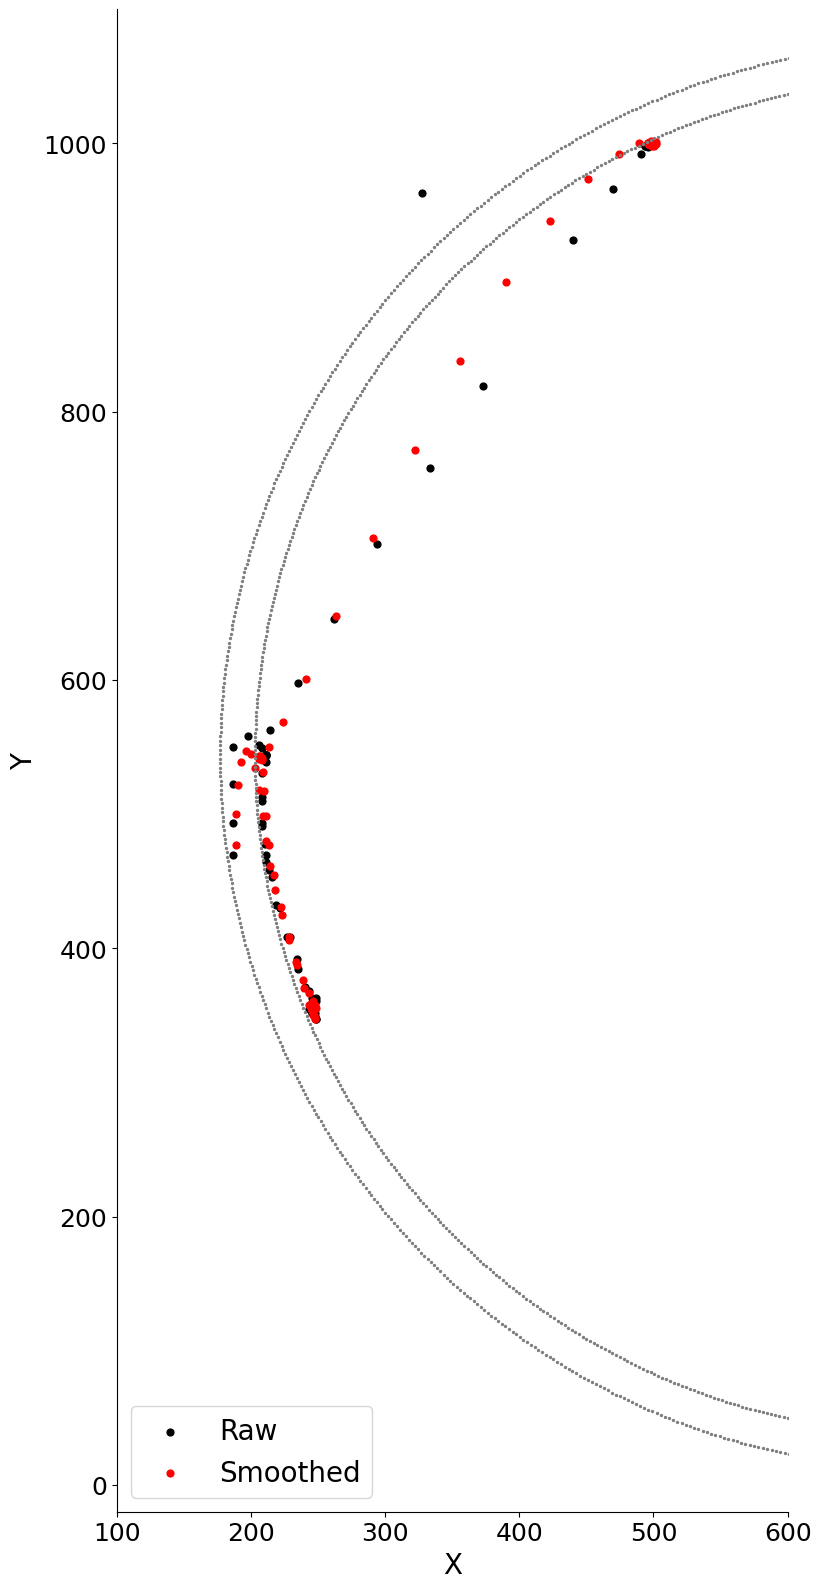

In [ ]:
origin = Mouse.arena.origin 
radius = int(Mouse.arena.metadata.ActiveRegion.ArenaInnerRadius)
angles = np.linspace(0, 2 * np.pi, 1000)

x_in = origin[0] + radius * np.cos(angles)
y_in = origin[1] + radius * np.sin(angles)


radius = int(Mouse.arena.metadata.ActiveRegion.ArenaOuterRadius)
x_out = origin[0] + radius * np.cos(angles)
y_out = origin[1] + radius * np.sin(angles)

mouse_pos = Mouse.mouse_pos[run_time:run_time + pd.Timedelta('8S')]

fig, axs = plt.subplots(1,1,figsize = (8, 16))

x = mouse_pos.x
y = mouse_pos.y
x_ = mouse_pos.smoothed_position_x
y_ = mouse_pos.smoothed_position_y
axs.scatter(x,y,s = 24, color = 'black', label = 'Raw')
axs.scatter(x_,y_,s = 24, color = 'red', label = 'Smoothed')
axs.scatter(x_in, y_in, color='grey', s=2) 
axs.scatter(x_out, y_out, color='grey', s=2)  
axs.legend(loc = 'lower left', fontsize = 20)
axs.set_xlabel('X', fontsize = 20)
axs.set_ylabel('Y', fontsize = 20)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_aspect('equal')
axs.set_xlim((100,600))
axs.set_ylim((-20,1100))
plt.tight_layout()
plt.savefig('Track.png')
plt.show()
